# Tugas 1 Machine Learning

### Nama : Adriati Manuk Allo
### NIM  : 2209105018

## **DAFTAR ISI**
- [DATASET](#0)
  - [0.1 Import Library](#0-1)
  - [0.2 Membaca dataset dari file csv](#0-2)
  - [0.3 Memeriksa jumlah kolom dan baris dalam dataset](#0-3)
- [DATA CLEANING](#1)
  - [1.1 Memeriksa jumlah missing value dalam masing-masing kolom](#1-1)
  - [1.2 Memeriksa tipe data di setiap kolom dan jumlah baris di setiap kolom](#1-2)
  - [1.3 Memeriksa nilai duplikasi di setiap kolom](#1-3)
  - [1.4 Memeriksa jumlah outlier dimasing-masing kolom bertipe numerik](#1-4)
  - [1.5 Menangani outlier pada kolom numerik](#1-5)
- [FEATURE ENGINEERING](#2)
  - [2.1 Konversi tipe data kategorigal ke numerik dengan One Hot Encoding](#2-1)
- [DATA TRANSFORMATION](#3)
  - [3.1 Normalisasi fitur numerik](#3-1)
- [MODELING](#4)
  - [4.1 Split Data](#4-1)
  - [4.2 Membangun model random forest](#4-2)
  - [4.3 Evaluasi model random forest](#4-3)
  - [4.4 Visualisasi Hasil](#4-4)

<a name="0"></a>
## **DATASET**

<blockquote> 

<br>**Deskripsi**</br>
Dataset ini dibuat secara sintetis untuk meniru data cuaca untuk tugas klasifikasi. Kumpulan data ini mencakup berbagai fitur terkait cuaca dan mengkategorikan cuaca menjadi empat jenis: Rainy (hujan), Sunny (cerah), Cloudy (berawan), and Snowy (bersalju). Dataset ini dapat diakses melalui link berikut __[Weather Classification Dataset](https://www.kaggle.com/datasets/nikhil7280/weather-type-classification)__.

<br>**Variabel**</br>
- *Temperature* (numerik): Suhu dalam derajat Celsius, mulai dari dingin ekstrem hingga panas ekstrem.
- *Humidity* (numerik): Persentase kelembaban, termasuk nilai di atas 100% untuk memperkenalkan outlier.
- *Wind Speed* (numerik): Kecepatan angin dalam kilometer per jam, dengan rentang termasuk nilai yang sangat tinggi.
- *Precipitation* (%) (numerik): Persentase curah hujan, termasuk nilai outlier.
- *Cloud Cover* (kategori): Deskripsi tutupan awan.
- *Atmospheric Pressure* (numerik): Tekanan atmosfer dalam hPa, yang mencakup rentang yang luas.
- *UV Index* (numerik): Indeks UV, yang menunjukkan kekuatan radiasi ultraviolet.
- *Season* (kategoris): Musim saat data direkam.
- *Visibility* (km) (numerik): Jarak pandang dalam kilometer, termasuk nilai yang sangat rendah atau sangat tinggi.
- *Location* (ketegori): Jenis lokasi tempat data direkam.
- *Weather Type* (ketegori): Variabel target untuk klasifikasi, yang menunjukkan jenis cuaca.

</blockquote>

>

<a name="0-1"></a>
## Import Library

<blockquote> Library Python yang digunakan antara lain: 
    
- Pandas
digunakan untuk memproses dan menganalisis data dalam bentuk tabel (DataFrame), seperti membaca file, manipulasi kolom/baris, dan cleaning data.
- Matplotlib
digunakan untuk membuat visualisasi data seperti grafik atau plot yang sederhana. Biasanya dipakai untuk eksplorasi data secara visual.
- Seaborn
merupakan library visualisasi berbasis Matplotlib yang menyediakan tampilan grafik yang lebih informatif dan estetis, sering digunakan untuk plot statistik seperti heatmap dan boxplot.
- OrdinalEncoder (dari sklearn.preprocessing)
digunakan untuk mengubah fitur kategorikal menjadi nilai numerik berdasarkan urutan. Cocok untuk fitur dengan urutan logis (ordinal).
- MinMaxScaler (dari sklearn.preprocessing)
digunakan untuk melakukan normalisasi fitur numerik ke dalam rentang 0 hingga 1 agar skala antar fitur sebanding.
- RandomForestClassifier (dari sklearn.ensemble)
digunakan untuk membangun model klasifikasi berbasis algoritma Random Forest, yaitu gabungan beberapa decision tree untuk meningkatkan akurasi.
- accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay (dari sklearn.metrics)
digunakan untuk mengevaluasi performa model klasifikasi dengan berbagai metrik evaluasi seperti akurasi, presisi, recall, dan f1-score, serta menampilkan confusion matrix.
- train_test_split, RandomizedSearchCV (dari sklearn.model_selection)
`train_test_split` digunakan untuk membagi dataset menjadi data latih dan data uji, sedangkan `RandomizedSearchCV` digunakan untuk melakukan hyperparameter tuning pada model.
- randint (dari scipy.stats)
digunakan untuk menghasilkan nilai integer acak, biasanya dipakai saat menentukan ruang pencarian (search space) untuk hyperparameter tuning.
</blockquote>

In [1]:
# Data Preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

<a name="0-2"></a>
### Membaca dataset dari file csv

In [2]:
### read dataset
df_weather = pd.read_csv('weather_classification_data.csv')
df_weather.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


<a name="0-3"></a>
### Memeriksa jumlah kolom dan baris dalam dataset

In [3]:
df_weather.shape

(13200, 11)

<a name="1"></a>
## **DATA CLEANING**

<a name="1-1"></a>
### Memeriksa jumlah missing value dalam masing-masing kolom

In [4]:
df_weather.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

<a name="1-2"></a>
### Memeriksa tipe data di setiap kolom dan jumlah baris di setiap kolom

In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


<a name="1-3"></a>
### Memeriksa nilai duplikasi di setiap kolom

In [6]:
df_weather.duplicated().sum()

0

<a name="1-4"></a>
### Memeriksa jumlah outlier dimasing-masing kolom bertipe numerik

In [7]:
df_weather.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [8]:
# ====== 1. Outlier Berdasarkan Z-Score ======
# Daftar kolom numerik yang akan dicek
columns_to_check = ['Temperature', 'Wind Speed', 
                    'Atmospheric Pressure', 'Visibility (km)', 'UV Index']

# Simpan jumlah outlier berdasarkan Z-Score
outliers_zscore = {}

for col in columns_to_check:
    z_scores = zscore(df_weather[col])
    outliers = df_weather[abs(z_scores) > 3]
    outliers_zscore[col] = outliers.shape[0]

print("Outlier Berdasarkan Z-Score (Sebelum Diubah):")
for col, count in outliers_zscore.items():
    print(f"- {col}: {count} outlier")

Outlier Berdasarkan Z-Score (Sebelum Diubah):
- Temperature: 92 outlier
- Wind Speed: 236 outlier
- Atmospheric Pressure: 556 outlier
- Visibility (km): 282 outlier
- UV Index: 0 outlier


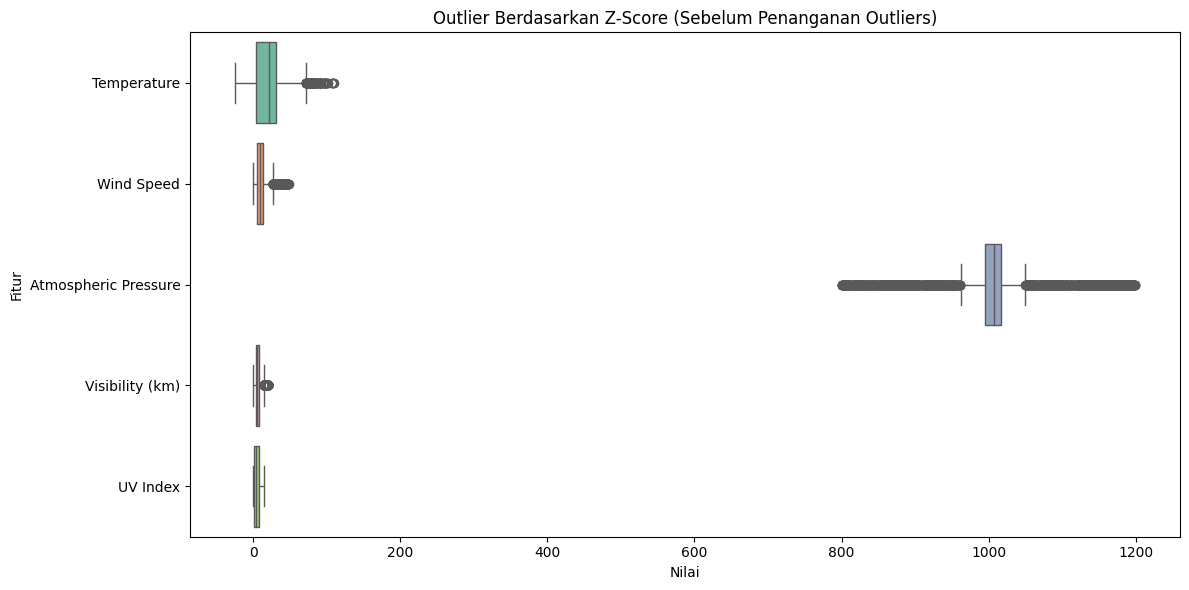

In [9]:
# Set ukuran plot
plt.figure(figsize=(12, 6))

# Buat boxplot untuk masing-masing kolom numerik
sns.boxplot(data=df_weather[columns_to_check], orient="h", palette="Set2")

# Tambahkan judul dan label
plt.title("Outlier Berdasarkan Z-Score (Sebelum Penanganan Outliers)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")

plt.tight_layout()
plt.show()

In [10]:
# ====== 2. Outlier Berdasarkan Batas Logis ======
# Humidity dan Precipitation seharusnya tidak > 100
columns_to_check_2 = ['Humidity', 'Precipitation (%)']
# Membuat dictionary untuk menyimpan jumlah outlier
logical_outliers = {}

# Mengiterasi setiap kolom dalam columns_to_check untuk mengecek outlier
for column in columns_to_check_2:
    logical_outliers[f'{column} > 100'] = df_weather[df_weather[column] > 100].shape[0]

# Menampilkan jumlah outlier berdasarkan batas logis
print("\nOutlier Berdasarkan Batas Logis:")
for column, outlier_count in logical_outliers.items():
    print(f"- {column}: {outlier_count} outlier")


Outlier Berdasarkan Batas Logis:
- Humidity > 100: 416 outlier
- Precipitation (%) > 100: 392 outlier


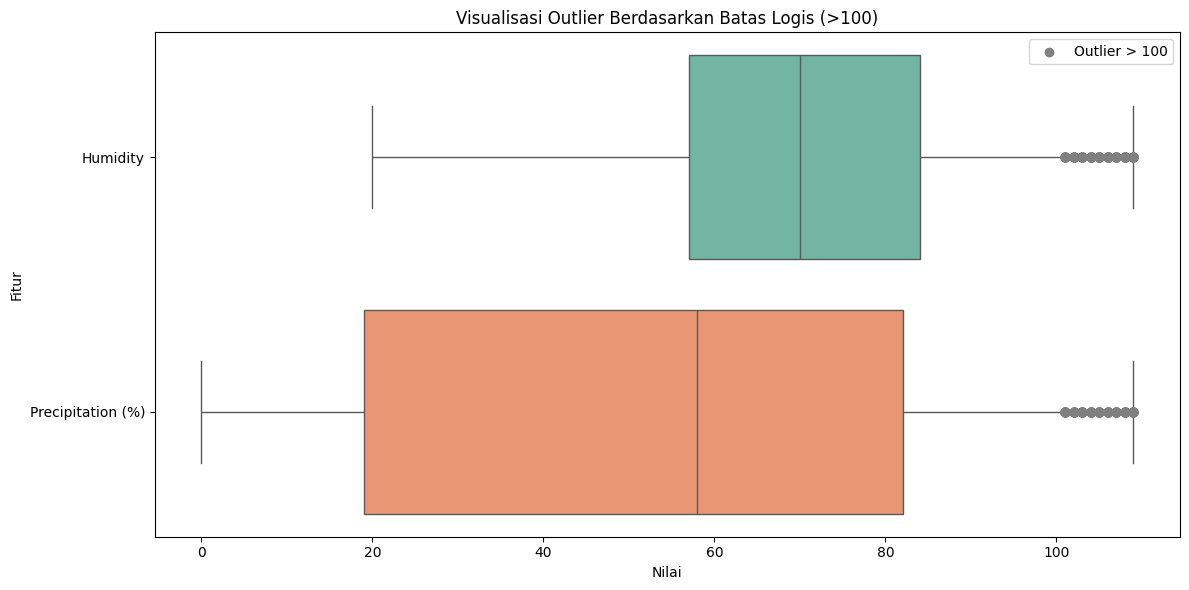

In [11]:
# Set ukuran plot
plt.figure(figsize=(12, 6))

# Buat boxplot normal
sns.boxplot(data=df_weather[columns_to_check_2], orient="h", palette="Set2", showfliers=True)

# Tambahkan titik merah untuk nilai > 100
for i, col in enumerate(columns_to_check_2):
    outliers = df_weather[df_weather[columns_to_check_2] > 100][col]
    plt.scatter(outliers, [i]*len(outliers), color='grey', label='Outlier > 100' if i == 0 else "", zorder=10)

# Label dan title
plt.title("Visualisasi Outlier Berdasarkan Batas Logis (>100)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.legend()
plt.tight_layout()
plt.show()

<blockquote> Berdasarkan hasil analisis, outlier pada kolom humidity dan precipitation perlu ditangani karena nilainya tidak masuk akal, seperti melebihi 100%. Sementara itu, meskipun outlier pada kolom temperature, wind speed, atmospheric pressure, dan visibility masih mungkin terjadi secara alami, saya memutuskan untuk menangani semua outlier demi menjaga kualitas data dan menghindari gangguan pada hasil model.
</blockquote> 

<a name="1-5"></a>
### Menangani outlier pada kolom numerik

In [12]:
# Salin data asli
df_cleaned = df_weather.copy()

In [13]:
### Imputation outliers dengan nilai median pada kolom Temperature, Wind Speed, Atmospheric Pressure', 'Visibility (km)
# Loop hingga tidak ada lagi outlier
while True:
    # Hitung Z-score untuk setiap kolom
    z_scores_df = df_cleaned[columns_to_check].apply(zscore)
    
    # Buat mask: True untuk baris yang tidak mengandung outlier di semua kolom
    mask = (z_scores_df.abs() <= 3).all(axis=1)
    
    # Jika tidak ada baris yang dihapus (sudah bersih), hentikan loop
    if mask.sum() == df_cleaned.shape[0]:
        break
    
    # Update dataframe hanya dengan baris yang aman
    df_cleaned = df_cleaned[mask]

# Cek jumlah outlier akhir
print("Outlier Berdasarkan Z-Score (Setelah Penghapusan Iteratif):")
for col in columns_to_check:
    z_scores = zscore(df_cleaned[col])
    count = (abs(z_scores) > 3).sum()
    print(f"- {col}: {count} outlier")

Outlier Berdasarkan Z-Score (Setelah Penghapusan Iteratif):
- Temperature: 0 outlier
- Wind Speed: 0 outlier
- Atmospheric Pressure: 0 outlier
- Visibility (km): 0 outlier
- UV Index: 0 outlier


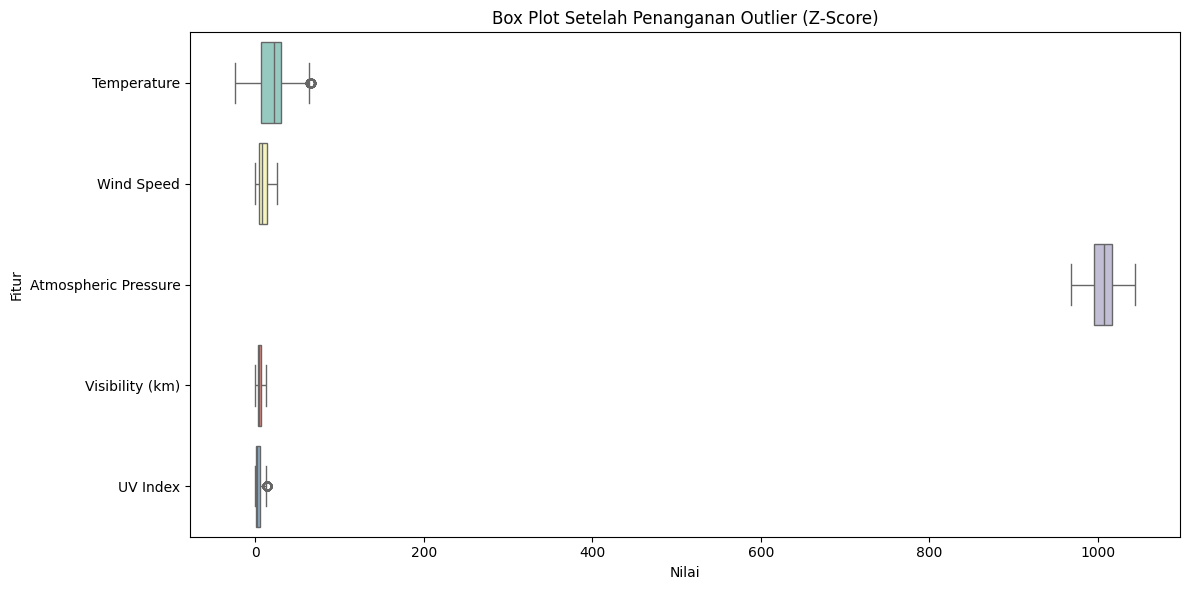

In [14]:
# Visualisasi setelah penanganan
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[columns_to_check], orient="h", palette="Set3")
plt.title("Box Plot Setelah Penanganan Outlier (Z-Score)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()

In [15]:
### Drop outliers pada kolom humidity dan precipitation
df_cleaned = df_cleaned[(df_cleaned['Humidity'] <= 100) & (df_cleaned['Precipitation (%)'] <= 100)]

# Humidity dan Precipitation seharusnya tidak > 100
columns_to_check_2 = ['Humidity', 'Precipitation (%)']

# Membuat dictionary untuk menyimpan jumlah outlier
logical_outliers = {}

# Mengiterasi setiap kolom dalam columns_to_check untuk mengecek outlier
for column in columns_to_check_2:
    logical_outliers[f'{column} > 100'] = df_cleaned[df_cleaned[column] > 100].shape[0]

# Menampilkan jumlah outlier berdasarkan batas logis
print("\nOutlier Berdasarkan Batas Logis:")
for column, outlier_count in logical_outliers.items():
    print(f"- {column}: {outlier_count} outlier")


Outlier Berdasarkan Batas Logis:
- Humidity > 100: 0 outlier
- Precipitation (%) > 100: 0 outlier


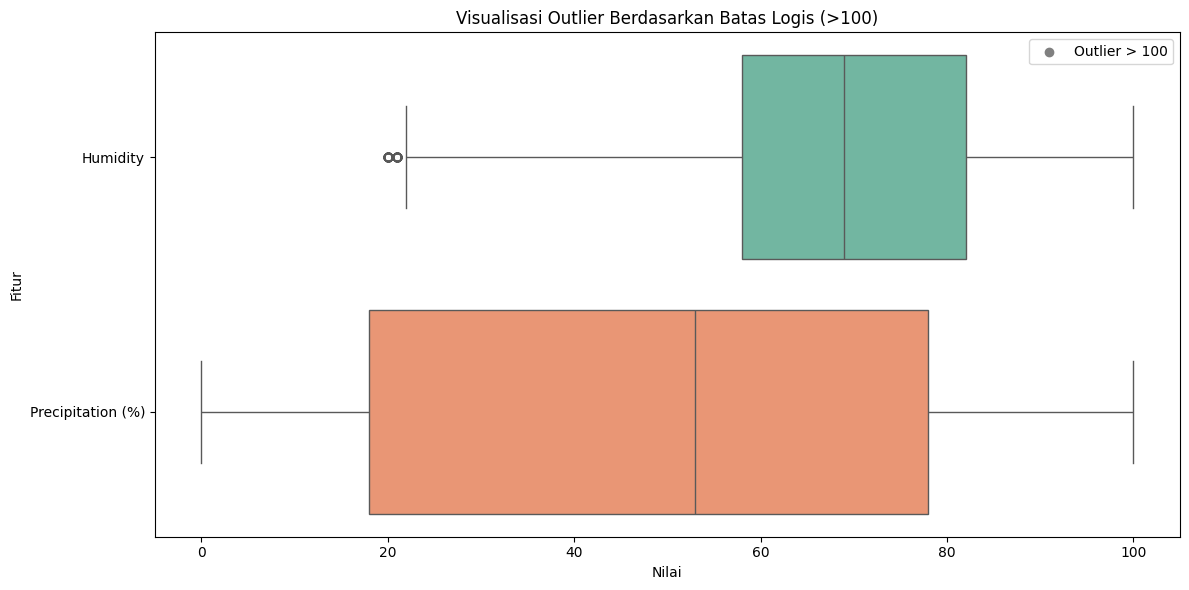

In [16]:
# Set ukuran plot
plt.figure(figsize=(12, 6))

# Buat boxplot normal
sns.boxplot(data=df_cleaned[columns_to_check_2], orient="h", palette="Set2", showfliers=True)

# Tambahkan titik merah untuk nilai > 100
for i, col in enumerate(columns_to_check_2):
    outliers = df_cleaned[df_cleaned[col] > 100][col]  # Perbaikan di sini
    plt.scatter(outliers, [i]*len(outliers), color='grey', label='Outlier > 100' if i == 0 else "", zorder=10)

# Label dan title
plt.title("Visualisasi Outlier Berdasarkan Batas Logis (>100)")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.legend()
plt.tight_layout()
plt.show()

<blockquote>Untuk menangani outliers pada kolom temperature, humidity, wind speed, precipitation, Atmospheric Pressure', 'Visibility (km), dan UV Index dilakukan penghapusan pada baris yang memiliki outliers. Pada kolom humidity dan precipitation, outlier di cek menggunakan IQT, sedangkan  kolom temperature, wind speed, atmospheric pressure', 'visibility, dan UV Index menggunakan Z-Score. Hal ini dilakukan karena jumlah outliers yang ada pada  kolom-kolom ini sedikit, sehingga ketika di hapus tidak memberikan pengaruh terhadap akurasi model.</blockquote>

In [17]:
df_cleaned.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,11102.000000,11102.000000,11102.000000,11102.000000,11102.000000,11102.000000,11102.000000
mean,18.638444,68.260313,9.050486,49.857233,1006.202899,3.427400,5.107638
std,15.334039,18.739972,5.482440,31.247346,12.811462,3.462736,2.540411
min,-24.000000,20.000000,0.000000,0.000000,967.860000,0.000000,0.000000
25%,4.000000,58.000000,5.000000,18.000000,995.782500,1.000000,3.000000
50%,21.000000,69.000000,8.500000,53.000000,1007.755000,2.000000,5.000000
75%,30.000000,82.000000,13.000000,78.000000,1016.250000,5.000000,7.500000
max,66.000000,100.000000,26.000000,100.000000,1044.040000,14.000000,12.500000


<a name="2"></a>
## **FEATURE ENGINEERING**

<a name="2-1"></a>
### Konversi tipe data kategorigal ke numerik dengan One Hot Encoding

In [18]:
df_cleaned['Cloud Cover'].unique()

array(['partly cloudy', 'clear', 'overcast', 'cloudy'], dtype=object)

In [19]:
df_cleaned['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [20]:
df_cleaned['Location'].unique()

array(['inland', 'mountain', 'coastal'], dtype=object)

In [21]:
eo = OrdinalEncoder()
df_cleaned[['Cloud Cover']] = eo.fit_transform(df_cleaned[['Cloud Cover']])
df_cleaned[['Season']] = eo.fit_transform(df_cleaned[['Season']])
df_cleaned[['Location']] = eo.fit_transform(df_cleaned[['Location']])
df_cleaned

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3.0,1010.82,2,3.0,3.5,1.0,Rainy
1,39.0,96,8.5,71.0,3.0,1011.43,7,1.0,10.0,1.0,Cloudy
2,30.0,64,7.0,16.0,0.0,1018.72,5,1.0,5.5,2.0,Sunny
3,38.0,83,1.5,82.0,0.0,1026.25,7,1.0,1.0,0.0,Sunny
4,27.0,74,17.0,66.0,2.0,990.67,1,3.0,2.5,2.0,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13194,29.0,62,13.0,17.0,2.0,1002.81,2,1.0,5.0,0.0,Cloudy
13195,10.0,74,14.5,71.0,2.0,1003.15,1,2.0,1.0,2.0,Rainy
13197,30.0,77,5.5,28.0,2.0,1012.69,3,0.0,9.0,0.0,Cloudy
13198,3.0,76,10.0,94.0,2.0,984.27,0,3.0,2.0,1.0,Snowy


<a name="3"></a>
## **DATA TRANSFORMATION**

<a name="3-1"></a>
### Normalisasi fitur numerik

In [22]:
numeric_columns = ['Temperature', 'Humidity', 'Wind Speed', 
                     'Precipitation (%)', 'Atmospheric Pressure', 
                     'UV Index', 'Visibility (km)']
sc = StandardScaler()
normalized_data = sc.fit_transform(df_cleaned[numeric_columns])

df_cleaned_normalized = df_cleaned.copy()
df_cleaned_normalized[numeric_columns] = normalized_data
df_cleaned_normalized.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,-0.302507,0.252930,0.081995,1.028702,3.0,0.360404,-0.412236,3.0,-0.632855,1.0,Rainy
1,1.327926,1.480308,-0.100414,0.676656,3.0,0.408020,1.031774,1.0,1.925902,1.0,Cloudy
2,0.740970,-0.227349,-0.374027,-1.083572,0.0,0.977068,0.454170,1.0,0.154455,2.0,Sunny
3,1.262709,0.786573,-1.377275,1.028702,0.0,1.564849,1.031774,1.0,-1.616992,0.0,Sunny
4,0.545318,0.306294,1.450061,0.516636,2.0,-1.212477,-0.701038,3.0,-1.026510,2.0,Rainy


<blockquote>Normalisasi dilakukan pada kolom temperature, humidity, wind speed, dan precipitation agar tidak ada fitur yang mendominasi karena skala yang besar. Selain itu, karena sebelumnya telah dilakukan penghapusan outlier, maka penggunaan MinMaxScaler dirasa lebih baik dibandingkan StandardScaler</blockquote>

<a name="4"></a>
## **MODELING**

<blockquote> 
Algoritma Random Forest dipilih untuk tugas klasifikasi cuaca karena kemampuannya menangani data numerik dan kategoris, serta cocok untuk klasifikasi multikelas seperti Rainy, Sunny, Cloudy, dan Snowy. Random Forest bekerja dengan membangun banyak pohon keputusan dari subset data dan fitur secara acak, lalu menggabungkan hasil prediksinya melalui voting mayoritas.

<br>Metode ini unggul karena:</br>
- Robust terhadap outlier dan noise, yang penting karena dataset mengandung nilai ekstrem.
- Tidak mudah overfitting, berkat pendekatan ensemble-nya.
- Dapat memberikan feature importance, membantu memahami fitur paling berpengaruh terhadap prediksi cuaca.
</blockquote> 


<a name="4-1"></a>
### Split Data

In [23]:
### Split data menjadi features (X) dan target (y)
X = df_cleaned_normalized.drop('Weather Type', axis=1)
y = df_cleaned_normalized['Weather Type']

### Split data menjadi data training dan data testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<a name="4-2"></a>
### Membangun model random forest

In [24]:
# Random search untuk hyperparameter tuning (optimasi)
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020C51286D40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020C4D7A3970>})

In [25]:
# Buat variabel baru untuk Hyperparameter terbaik
best_rf = rand_search.best_estimator_

# Hasil dari Hyperparameter terbaik
print('Hyperparameter terbaik:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 387}


<a name="4-3"></a>
### Evaluasi model random forest

In [28]:
y_pred = best_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print ("Accuracy;", accuracy)
print ("Precision;", precision)
print ("Recall;", recall )
print ("F1 Score;", f1)

Accuracy; 0.9819900945520036
Precision; 0.9821937525477561
Recall; 0.9819900945520036
F1 Score; 0.9820415733420198


<a name="4-4"></a>
### Visualisasi Hasil 

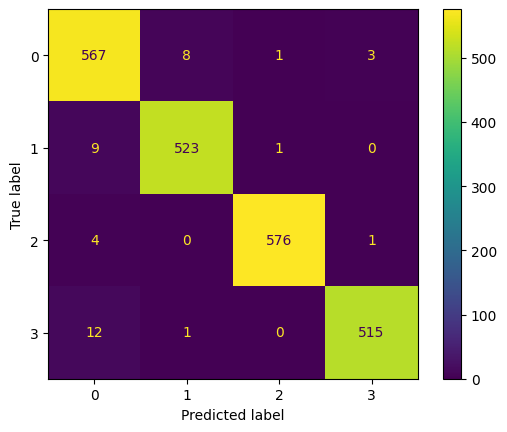

In [29]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot();